# Forest Cover Classification Portfolio Project: Attempt 4

In  previous models, we created a model with three network layers between the input and output layers. These had 128, 64, and 32 neurons, respectively. This improved the performance compared to the first attempt.

In the third go, we added another layer of 128 neurons after the input layer and also added dropout layers. That didn't work as well, in terms of all the metrics we used, compared to the second version of the network.

So this time we'll remove the dropout layers, but add a Dense layer and keep the number of epochs the same (200).

Let's see how it goes...


In [1]:
# Doing the same task, yet again, but this time tweaking hyperparameters and neural net to try to improve accuracy and reduce loss
# Load the data...
import pandas as pd
from sklearn.model_selection import train_test_split
dataset = pd.read_csv('cover_data.csv')
features = dataset.iloc[:,0:-1]
labels = dataset.iloc[:,-1]
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.33, random_state=42, stratify=labels)

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

stan_scaler = StandardScaler()

features_train_normalized = stan_scaler.fit_transform(features_train)
features_test_normalized = stan_scaler.transform(features_test)

ct = ColumnTransformer([('numeric', StandardScaler(), ["Elevation", "Aspect","Slope","Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology","Horizontal_Distance_To_Roadways","Hillshade_9am","Hillshade_Noon","Hillshade_3pm","Horizontal_Distance_To_Fire_Points"])])

features_train_scale = ct.fit_transform(features_train)
features_test_scale = ct.transform(features_test)

In [5]:
# Build the model
# This time, adding an extra Dense layer of 128 neurons and adding dropout layers between them
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, InputLayer
import os
# Turn off GPU usage for tf
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
os.environ["TF_CPP_MIN_LOG_LEVEL"] = '2'

model = keras.Sequential()
model.add(InputLayer(input_shape=(features_train_scale.shape[1],)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(8, activation='softmax'))

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 256)               2816      
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 8)                 264       
                                                                 
Total params: 46,312
Trainable params: 46,312
Non-trainable params: 0
_________________________________________________________________


In [7]:
NUM_EPOCHS = 200
BATCH_SIZE = 1024
history = model.fit(features_train_scale, labels_train, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE, validation_split=0.1, verbose=1)

Epoch 1/200
343/343 [==============================] - 2s 5ms/step - loss: 0.7329 - accuracy: 0.6967 - val_loss: 0.6163 - val_accuracy: 0.7302
Epoch 2/200
343/343 [==============================] - 2s 5ms/step - loss: 0.5973 - accuracy: 0.7387 - val_loss: 0.5787 - val_accuracy: 0.7486
Epoch 3/200
343/343 [==============================] - 2s 5ms/step - loss: 0.5632 - accuracy: 0.7542 - val_loss: 0.5528 - val_accuracy: 0.7578
Epoch 4/200
343/343 [==============================] - 2s 5ms/step - loss: 0.5364 - accuracy: 0.7675 - val_loss: 0.5253 - val_accuracy: 0.7722
Epoch 5/200
343/343 [==============================] - 2s 5ms/step - loss: 0.5138 - accuracy: 0.7783 - val_loss: 0.5191 - val_accuracy: 0.7713
Epoch 6/200
343/343 [==============================] - 2s 5ms/step - loss: 0.4955 - accuracy: 0.7871 - val_loss: 0.4944 - val_accuracy: 0.7862
Epoch 7/200
343/343 [==============================] - 2s 5ms/step - loss: 0.4804 - accuracy: 0.7941 - val_loss: 0.5049 - val_accuracy: 0.7793

Epoch 58/200
343/343 [==============================] - 2s 5ms/step - loss: 0.2864 - accuracy: 0.8820 - val_loss: 0.3298 - val_accuracy: 0.8667
Epoch 59/200
343/343 [==============================] - 2s 5ms/step - loss: 0.2865 - accuracy: 0.8818 - val_loss: 0.3207 - val_accuracy: 0.8694
Epoch 60/200
343/343 [==============================] - 2s 6ms/step - loss: 0.2832 - accuracy: 0.8836 - val_loss: 0.3074 - val_accuracy: 0.8760
Epoch 61/200
343/343 [==============================] - 2s 5ms/step - loss: 0.2817 - accuracy: 0.8844 - val_loss: 0.3185 - val_accuracy: 0.8715
Epoch 62/200
343/343 [==============================] - 2s 5ms/step - loss: 0.2822 - accuracy: 0.8836 - val_loss: 0.3305 - val_accuracy: 0.8643
Epoch 63/200
343/343 [==============================] - 2s 6ms/step - loss: 0.2810 - accuracy: 0.8843 - val_loss: 0.3067 - val_accuracy: 0.8748
Epoch 64/200
343/343 [==============================] - 2s 5ms/step - loss: 0.2799 - accuracy: 0.8850 - val_loss: 0.3433 - val_accuracy:

Epoch 115/200
343/343 [==============================] - 2s 5ms/step - loss: 0.2337 - accuracy: 0.9050 - val_loss: 0.2954 - val_accuracy: 0.8814
Epoch 116/200
343/343 [==============================] - 2s 5ms/step - loss: 0.2324 - accuracy: 0.9056 - val_loss: 0.2784 - val_accuracy: 0.8879
Epoch 117/200
343/343 [==============================] - 2s 4ms/step - loss: 0.2328 - accuracy: 0.9054 - val_loss: 0.2666 - val_accuracy: 0.8928
Epoch 118/200
343/343 [==============================] - 2s 4ms/step - loss: 0.2329 - accuracy: 0.9056 - val_loss: 0.2832 - val_accuracy: 0.8849
Epoch 119/200
343/343 [==============================] - 2s 4ms/step - loss: 0.2320 - accuracy: 0.9066 - val_loss: 0.2785 - val_accuracy: 0.8897
Epoch 120/200
343/343 [==============================] - 2s 5ms/step - loss: 0.2322 - accuracy: 0.9059 - val_loss: 0.2927 - val_accuracy: 0.8833
Epoch 121/200
343/343 [==============================] - 2s 7ms/step - loss: 0.2299 - accuracy: 0.9065 - val_loss: 0.2778 - val_ac

343/343 [==============================] - 2s 6ms/step - loss: 0.2071 - accuracy: 0.9166 - val_loss: 0.2578 - val_accuracy: 0.8986
Epoch 172/200
343/343 [==============================] - 2s 5ms/step - loss: 0.2081 - accuracy: 0.9159 - val_loss: 0.2514 - val_accuracy: 0.9004
Epoch 173/200
343/343 [==============================] - 2s 6ms/step - loss: 0.2064 - accuracy: 0.9167 - val_loss: 0.2748 - val_accuracy: 0.8904
Epoch 174/200
343/343 [==============================] - 2s 5ms/step - loss: 0.2073 - accuracy: 0.9166 - val_loss: 0.2602 - val_accuracy: 0.8977
Epoch 175/200
343/343 [==============================] - 2s 5ms/step - loss: 0.2035 - accuracy: 0.9181 - val_loss: 0.2469 - val_accuracy: 0.9019
Epoch 176/200
343/343 [==============================] - 2s 5ms/step - loss: 0.2049 - accuracy: 0.9176 - val_loss: 0.2474 - val_accuracy: 0.9024
Epoch 177/200
343/343 [==============================] - 2s 6ms/step - loss: 0.2066 - accuracy: 0.9170 - val_loss: 0.2496 - val_accuracy: 0.9012

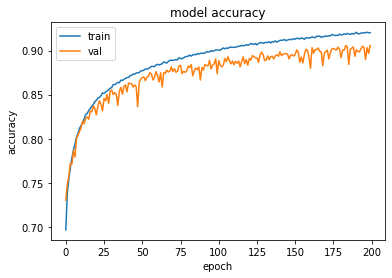

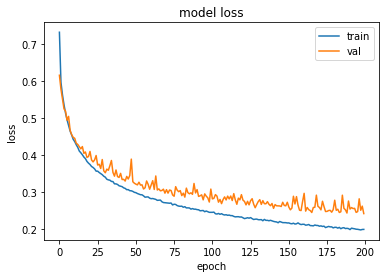

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np

score = model.evaluate(features_test_scale, labels_test, verbose=0)
print(f'Test loss: {score[0]}')
print(f'Test accuracy: {score[1]}')

prediction = model.predict(features_test_scale)
prediction = np.argmax(prediction, axis=1)

class_names = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz']
print(classification_report(labels_test, prediction, target_names=class_names))

Test loss: 0.24242611229419708
Test accuracy: 0.9055253863334656
5992/5992 [==============================] - 5s 903us/step
                   precision    recall  f1-score   support

       Spruce/Fir       0.91      0.90      0.90     69907
   Lodgepole Pine       0.91      0.93      0.92     93489
   Ponderosa Pine       0.90      0.89      0.90     11799
Cottonwood/Willow       0.81      0.80      0.80       907
            Aspen       0.85      0.68      0.76      3133
      Douglas-fir       0.84      0.80      0.82      5731
        Krummholz       0.92      0.91      0.92      6768

         accuracy                           0.91    191734
        macro avg       0.88      0.84      0.86    191734
     weighted avg       0.91      0.91      0.91    191734



In [10]:
prediction = np.argmax(model.predict(features_test_scale), axis=1)

5992/5992 [==============================] - 6s 922us/step


[Text(0, 0.5, 'Spruce/Fir'),
 Text(0, 1.5, 'Lodgepole Pine'),
 Text(0, 2.5, 'Ponderosa Pine'),
 Text(0, 3.5, 'Cottonwood/Willow'),
 Text(0, 4.5, 'Aspen'),
 Text(0, 5.5, 'Douglas-fir'),
 Text(0, 6.5, 'Krummholz')]

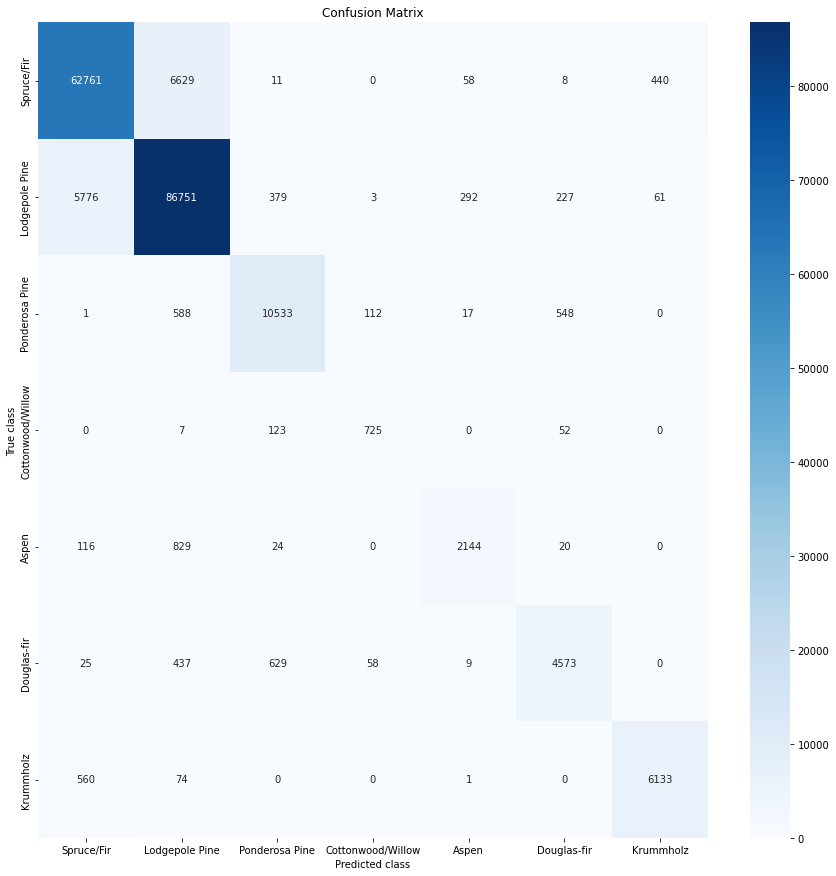

In [11]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(labels_test, prediction)
class_names = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz']
fig, ax = plt.subplots(figsize=(15, 15))
heatmap = sns.heatmap(cm, fmt='g', cmap='Blues', annot=True, ax=ax)
ax.set_xlabel('Predicted class')
ax.set_ylabel('True class')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(class_names)
ax.yaxis.set_ticklabels(class_names)

## Observations

So we added another layer of 256 neurons after the input layer and removed dropout layers. New model now includes 4 layers, with 256, 128, 64, and 32 neurons. 

Generally, this did  improve performance and accuracy, precision, recall, and f1 score all increased. Accurracy exceeded 0.9!

Test loss: 0.24242611229419708

Test accuracy: 0.9055253863334656

Precision, recall, and f1 score were often above 0.9 for most classes; however, all three of these metrics were quite low for the 'Aspen' class in particular (I wonder why?)

One other interesting thing that we can observe is that loss and accuracy on the validation set was quite jumpy/erratic compared to previous models, even though it performed well with respect to these metrics overall. This could indicate overfitting. In which case, we could attempt using a larger batch size and a lower learning rate.

Given that the model was larger, with more layers and more neurons, the model took slightly longer to train: training took approx. 7 mins.

In the next models, we'll look at using a lower learning rate and higher batch size to see if the erratic learning is reduced. We'll also add a timer to see how long the model takes to train.
